# Exercice 2 : portrait de phase du pendule

On considère un pendule de longueur $l$. L'évolution de $\theta$ l'angle du pendule par rapport à la verticale est donnée par l'équation suivante :
$$
\theta''(t)+\frac{g}{l}\sin(\theta(t))=0.
$$
On définit $\omega=\theta'$, on a ainsi le système 
\begin{equation*}
\left\{
\begin{array}{l}
\theta'(t)=\omega(t) \\
\omega'(t)=-\displaystyle\frac{g}{l}\sin(\theta(t)).
\end{array}
\right.
\end{equation*}
On suppose que $\theta(0)$ et  $\omega(0)$ sont donnés. 
On veut tracer le portrait de phase de ce problème pour les paramètres
$l=5$ et $g=9.81$.

**Q1)** Tracer la solution de ce problème dans le plan des phases pour la donnée initiale
  $(\theta(0),\omega(0)) = (\theta_0,0)$ avec $\theta_0 \in [0 , 2\pi]$
  (prendre de nombreuses valeurs de $\theta_0$ et tracer toutes les solutions sur le même graphe).
  On pourra résoudre le système en utilisant la commande `odeint` du module `scipy.integrate`.

> La syntaxe pour la commande  `odeint`  est `sol=integrate.odeint(f,X0,t)` où 
> - `f` a été définie de la façon suivante : `def f(X,t): ... ` (même si  `f`  ne dépend pas de `t`, il faut que l'argument apparaisse en seconde position en entrée);
> - `X0` correspond à la condition initiale ;
> - `t` est le vecteur contenant les temps en lesquels la solution est évaluée (le premier coefficient du vecteur est le temps initial) ;
> - `sol` est le vecteur contenant les valeurs prises par la solution évaluée aux temps du vecteur `t`. 

**Q2)** Ajouter less courbes issues des données initiales $(-\pi , \omega_0)$ avec $\omega_0 > 0$ et $(3\pi , \omega_0)$ avec $\omega_0 < 0$.

**Q3)** Ajouter les points critiques sur cette figure.

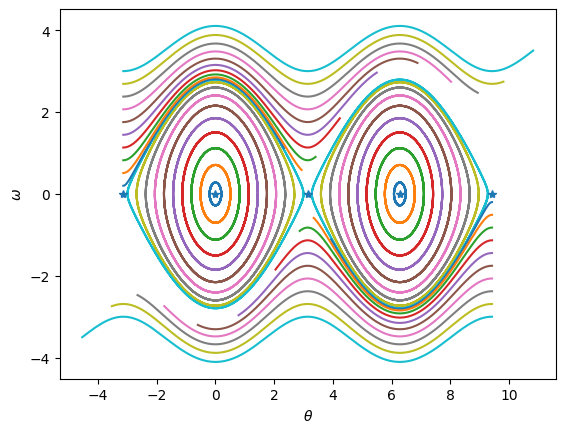

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

##### Parametres
g = 9.81
l = 5
T = 24
N = 1000

## fonction second membre
def f(X,t):
    return np.array([X[1], -g/l*np.sin(X[0])])

tps = np.linspace(0,T,N+1)

###### portrait de phase
plt.figure()
tps = np.linspace(0,T,N+1)
## premier point critique (0)
for k in np.linspace(0.2,3.,10):
    X0 = np.array([k,0])
    sol_ODE = integrate.odeint(f,X0,tps)
    theta_ode , omega_ode = sol_ODE[:,0] , sol_ODE[:,1]
    plt.xlabel('$\\theta$')
    plt.ylabel('$\\omega$')
    plt.plot(theta_ode,omega_ode)

## troisieme point critique (2pi)
for k in np.linspace(0.2,3.,10):
    X0 = np.array([2*np.pi+k,0])
    sol_ODE = integrate.odeint(f,X0,tps)
    theta_ode , omega_ode = sol_ODE[:,0] , sol_ODE[:,1]
    plt.plot(theta_ode,omega_ode)

T = 4
tps = np.linspace(0,T,N+1)
for k in np.linspace(0.2,3.,10):
    X0 = np.array([-np.pi,k])
    sol_ODE = integrate.odeint(f,X0,tps)
    theta_ode , omega_ode = sol_ODE[:,0] , sol_ODE[:,1]
    plt.plot(theta_ode,omega_ode)
## au-dessous
for k in np.linspace(0.2,3.,10):
    X0 = np.array([3*np.pi,-k])
    sol_ODE = integrate.odeint(f,X0,tps)
    theta_ode , omega_ode = sol_ODE[:,0] , sol_ODE[:,1]
    plt.plot(theta_ode,omega_ode)

## points critiques
pt_critique_x = np.array([-np.pi, 0., np.pi, 2*np.pi, 3*np.pi])
pt_critique_y = np.array([0., 0., 0.,0., 0.])
plt.plot(pt_critique_x, pt_critique_y, marker = '*', label="points critiques",linestyle='None')


**Q4)**  Sur une autre figure, représenter le diagramme des phases près du point $(0,0)$. Ajouter les isoclines.
Enfin, nous allons représenter la fonction second membre $f(\theta,\omega) = (\omega, -\frac{g}{l}\sin(\theta))$ sur cette figure.
Pour cela, on pourra utiliser les commandes `np.meshgrid` et `plt.quiver`.

(-3.5, 10.0)

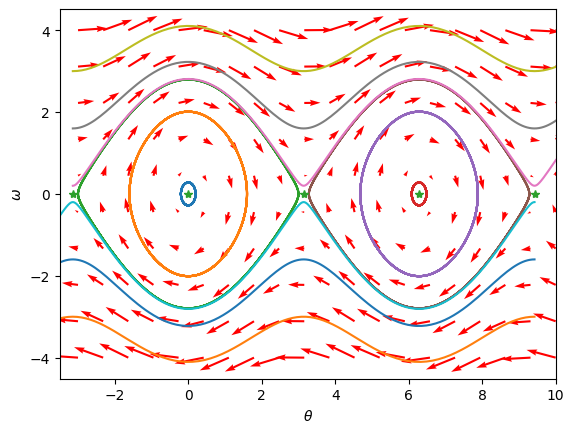

In [2]:
y1 = np.linspace(-3,10,20)
y2 = np.linspace(-4,4,10)
Y1, Y2 = np.meshgrid(y1,y2)

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
NI,NJ = Y1.shape
for i in range(NI):
  for j in range(NJ):
    x = Y1[i, j]
    y = Y2[i, j]
    yprime = f([x, y], 0)
    u[i,j] = yprime[0]
    v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

T = 40
tps = np.linspace(0,T,N+1)
## premier point critique (0)
for k in np.linspace(0.2,3.,3):
    X0 = np.array([k,0])
    sol_ODE = integrate.odeint(f,X0,tps)
    theta_ode , omega_ode = sol_ODE[:,0] , sol_ODE[:,1]
    plt.xlabel('$\\theta$')
    plt.ylabel('$\\omega$')
    plt.plot(theta_ode,omega_ode)

## troisieme point critique (2pi)
for k in np.linspace(0.2,3.,3):
    X0 = np.array([2*np.pi+k,0])
    sol_ODE = integrate.odeint(f,X0,tps)
    theta_ode , omega_ode = sol_ODE[:,0] , sol_ODE[:,1]
    plt.plot(theta_ode,omega_ode)

T = 40
tps = np.linspace(0,T,N+1)
for k in np.linspace(0.2,3.,3):
    X0 = np.array([-np.pi,k])
    sol_ODE = integrate.odeint(f,X0,tps)
    theta_ode , omega_ode = sol_ODE[:,0] , sol_ODE[:,1]
    plt.plot(theta_ode,omega_ode)
## au-dessous
for k in np.linspace(0.2,3.,3):
    X0 = np.array([3*np.pi,-k])
    sol_ODE = integrate.odeint(f,X0,tps)
    theta_ode , omega_ode = sol_ODE[:,0] , sol_ODE[:,1]
    plt.plot(theta_ode,omega_ode)
## points critiques
pt_critique_x = np.array([-np.pi, 0., np.pi, 2*np.pi, 3*np.pi])
pt_critique_y = np.array([0., 0., 0.,0., 0.])
plt.plot(pt_critique_x, pt_critique_y, marker = '*', label="points critiques",linestyle='None')
plt.xlim(-3.5,10)
